#### import packages :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data :

In [2]:
visa_df=pd.read_csv(r"C:\Users\Adireddy\Documents\Naresh IT Data Science & AI\Data files\visadataset - visadataset.csv")
visa_df       # visa_df is the DataFrame name 

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


#### Box plot :

- Box plot is used to detect ouliers
- Box plot has min Q1, Q2, Q3 max value
- Inside box plot red line represents median which is 50 percentile data

#### outlier :

- very very huge observation
- very very small observation
- which pull the data in any side of the distribution
- mild outliers :
    - Q1-1.5*IQR and Q3+1.5*IQR
- strong outliers :
    - Q1-3*IQR and Q3+3*IQR
- IQR: inter quartile range
    - IQR=Q3-Q1
- Q1: 25p (percentile)
- Q2: 50p
- Q3: 75p  IQR

In [ ]:
# box plot diagram :

          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

{'whiskers': [<matplotlib.lines.Line2D at 0x150a85ebfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x150a85f1290>,
 'boxes': [<matplotlib.lines.Line2D at 0x150a85eb650>],
 'medians': [<matplotlib.lines.Line2D at 0x150a85f2410>],
 'fliers': [<matplotlib.lines.Line2D at 0x150a85f2c90>],
 'means': []}

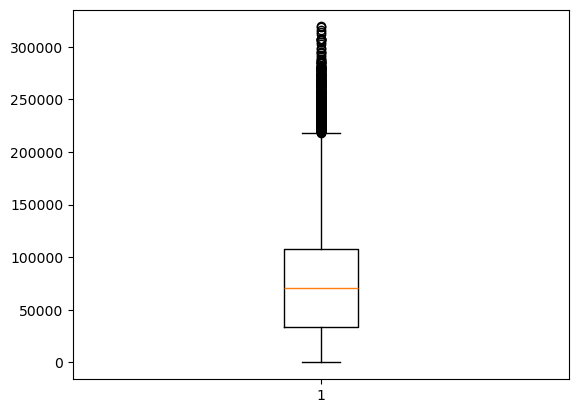

In [4]:
plt.boxplot(visa_df['prevailing_wage']) 

# we'll get lot of outliers
# do shift+tab inside () to know more clearly, what to pass inside (), to rotate the box plot

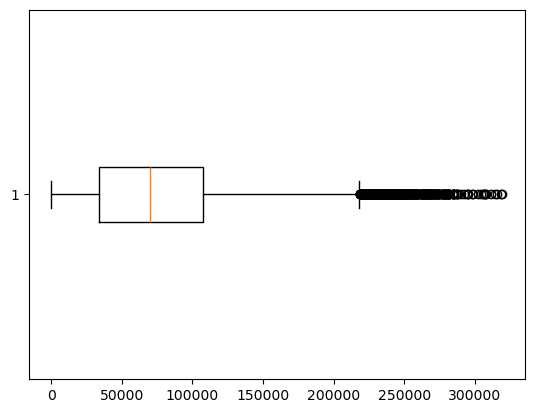

In [5]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)    # to rotate box plot horizontally
plt.show()         # to remove english words on top of box plot

In [ ]:
# the above box plot is using matplotlib

<Axes: >

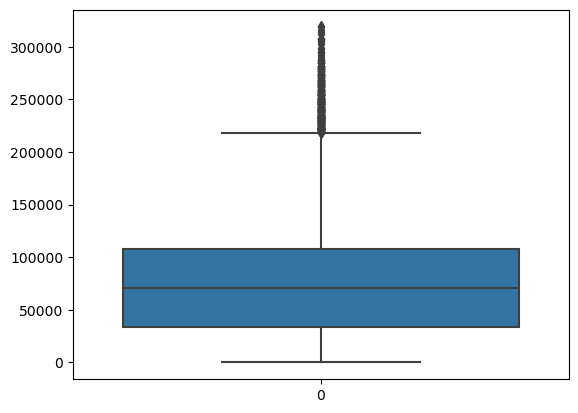

In [6]:
# box plot using seaborn:
sns.boxplot(visa_df['prevailing_wage'])

<Axes: >

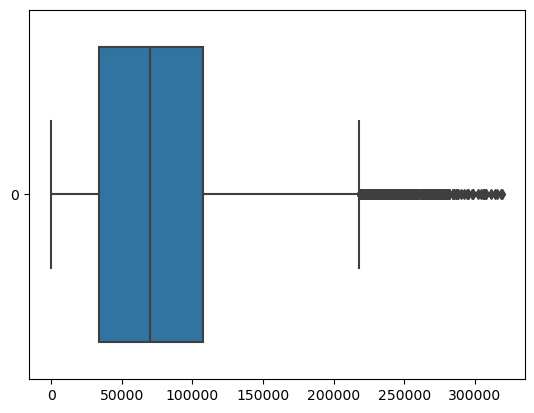

In [7]:
# do shift+tab inside () to know how to rotate the box plot horizontally
sns.boxplot(visa_df['prevailing_wage'],orient='h')

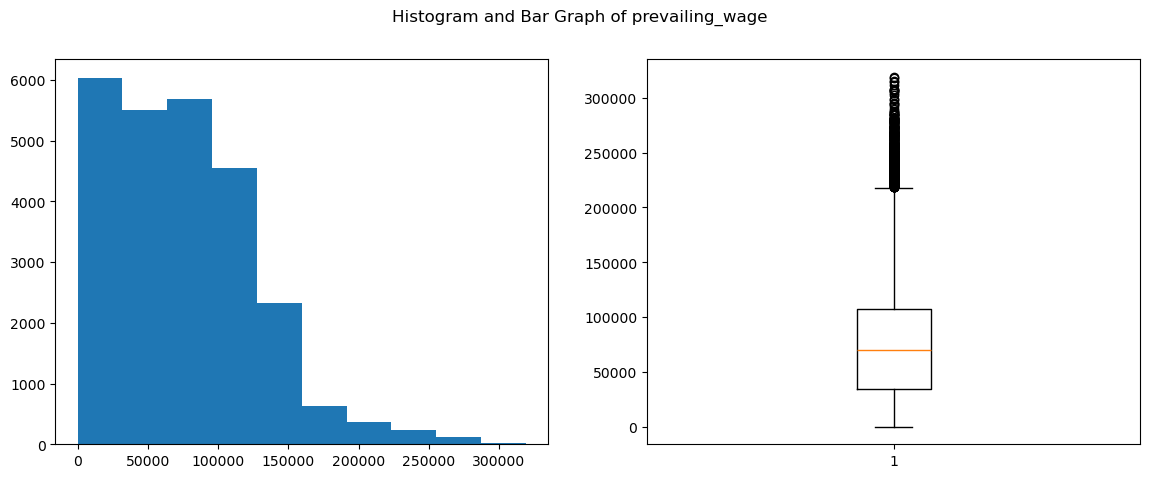

In [11]:
plt.figure(figsize=(14,5))
plt.suptitle('Histogram and Bar Graph of prevailing_wage')
plt.subplot(1,2,1)
plt.hist(visa_df['prevailing_wage'])  
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

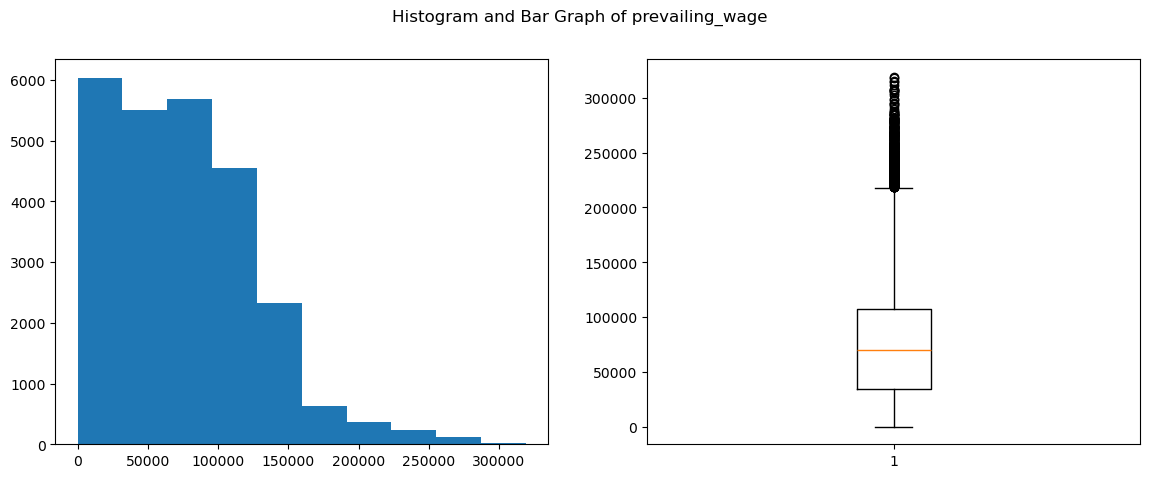

In [10]:
plt.figure(figsize=(14,5))
plt.suptitle('Histogram and Bar Graph of prevailing_wage')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])  # you can write directly like this instead of 2 lines
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

#### Finding outliers :
- outliers are available less than Q1-1.5*IQR
- outliers are available greater than Q3+1.5*IQR
- Step-1:
    - calculate Q1
    - calculate Q3
    - calculate IQR: Q3-Q1
- Step-2:
    - LB=Q1-1.5*IQR     LB: lower bound
    - UB=Q3+1.5*IQR     UB: upper bound
- Step-3:
    - con1=visa_df['prevailing_wage']<LB
    - con2=visa_df['prevailing_wage']>UB
    - apply or operator and get the outliers data

#### outliers data :

In [12]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)     # Q1 is 25 percentile data
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)     # Q3 is 75 percentile data
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1|con2]
len(outliers_data)

427

#### non outliers data :

In [13]:
# reverse of outliers data at some steps

Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)     # Q1 is 25 percentile data
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)     # Q3 is 75 percentile data
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

#### Histogram and Box Plot for non outliers data :

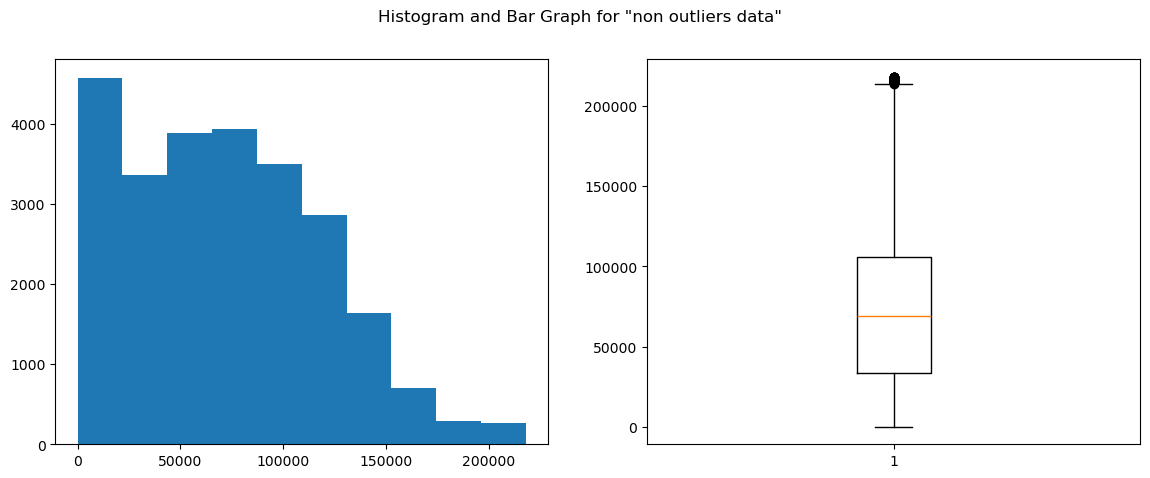

In [14]:
plt.figure(figsize=(14,5))
plt.suptitle('Histogram and Bar Graph for "non outliers data"')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])     # 25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])  # 25053
plt.show()

#### comparing total data with non outliers data :

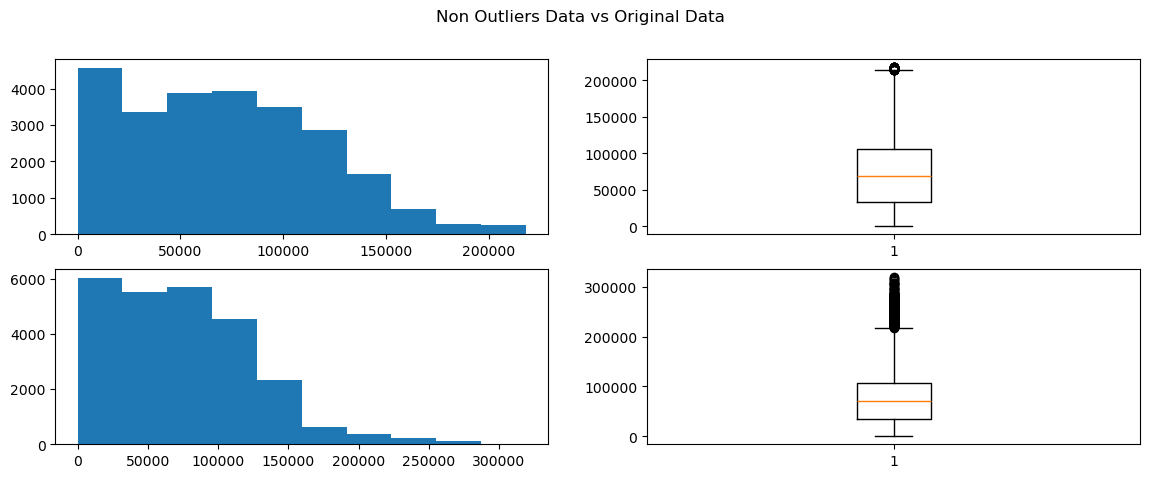

In [15]:
plt.figure(figsize=(14,5))
plt.suptitle('Non Outliers Data vs Original Data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])

plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])
plt.show()

#### comparision of total data with non outliers data on same plot :

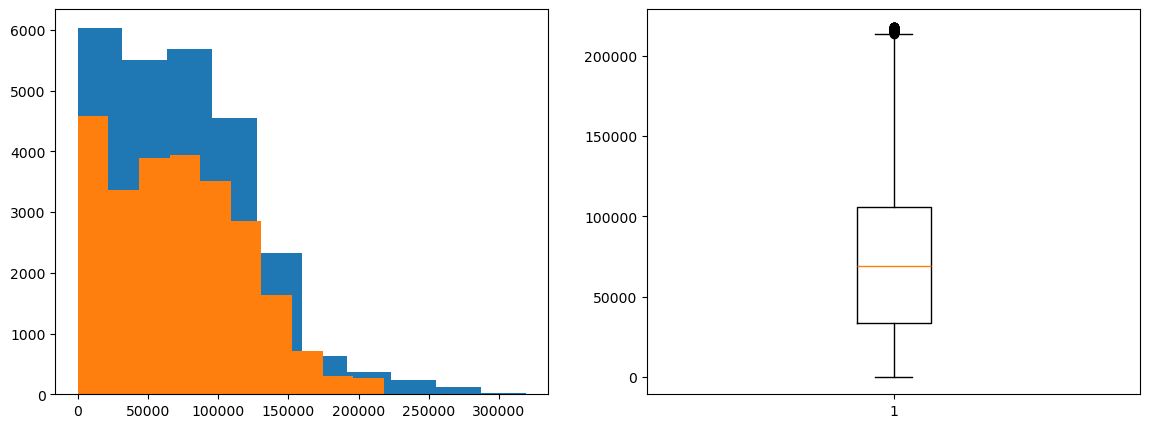

In [16]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

#### How to deal the outliers :
- **Method-1: Drop the outliers**
    - drop the outliers is not a good idea
    - when you drop the outliers, all the rows data will loss
    - for example here we are dropping 427 rows
    - x% of 25480=427
    - it is 1.7% of data, here it is fine we can drop the outliers
- **Method-2: Fill with median value**
    - we already know that outliers does not affect the median
    - so we can fill outliers by median
- **Method-3: Cap the values with Q1 and Q3**
    - all less than lower bound values, we can replace with Q1 or LB
    - all greater than upper bound values, we can replace with Q3 or UB

#### Fill outliers with median :
- create a empty list
- calculate median value: visa_df['prevailing_wage'].median()
- iterate the visa_df['prevailing_wage'].values
- if each value less than LB or greater than UB, then append with median vlaues
- else append with i value

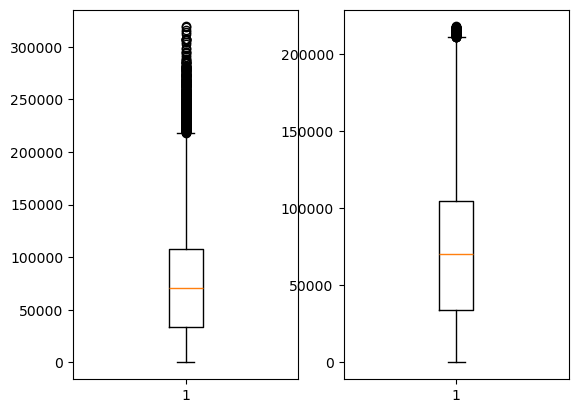

In [17]:
l1=[]                                        # empty list
median=visa_df['prevailing_wage'].median()   # to calculate median
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
for value in visa_df['prevailing_wage'].values:
    if value<LB or value>UB:
        l1.append(median)     # means if it is a outlier append with median value
    else:
        l1.append(value)     # if it is not outlier append with same value
visa_df_copy=visa_df.copy()  # visa_df_copy: it has median values in place of outliers, visa_df: original data
visa_df_copy['prevailing_wage']=l1
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()

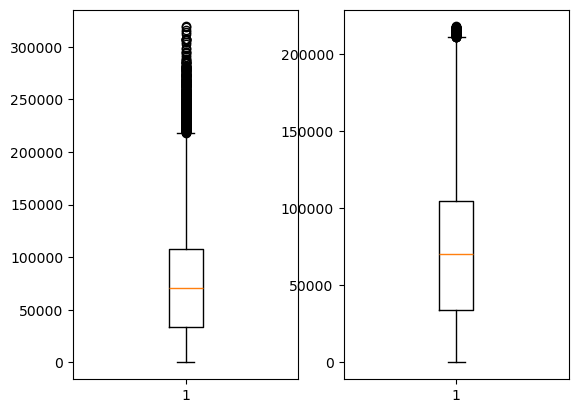

In [18]:
l=[]                                        # empty list
median=visa_df['prevailing_wage'].median()   # to calculate median
for i in visa_df['prevailing_wage'].values:
    if i<LB or i>UB:
        l.append(median)     # means if it is a outlier append with median value
    else:
        l.append(i)     # if it is not outlier append with same value
visa_df_copy=visa_df.copy()  # visa_df_copy: it has median values in place of outliers, visa_df: original data
visa_df_copy['prevailing_wage']=l
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()

# visa_df: original data
# visa_df_copy: has median values in place of outliers

#### np.where :
- np.where will use for binary condition
- It has 3 arguments
    - condition
    - value if condition is True
    - value if condition is False

In [20]:
d={"sub":["DS","ML","CS"],
   "Marks":[100,150,20]}
data=pd.DataFrame(d)   # creates a dataframe with the provided data
data

# Marks column should replace with 1 when value>100 
# else same value
# Marks   Marks
# 100      100
# 150       1
# 20       20

,sub,Marks
0,DS,100
1,ML,150
2,CS,20


In [21]:
con=data['Marks']>100
l=np.where(con,1,data['Marks'])     # np.where(condition,value if condition True,value if condition False)
l

# if condition is True then replace with: 1
# if condition is False then replace with: data[Marks']

array([100,   1,  20], dtype=int64)

#### Fill outliers with median using np.where :

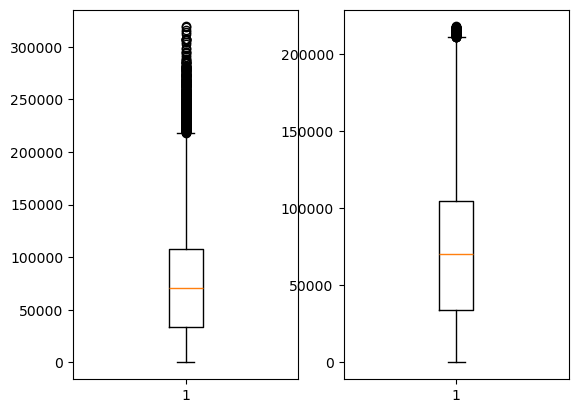

In [24]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
con=con1|con2           # | (or operator)
median=visa_df['prevailing_wage'].median()
new_data=np.where(con,
                  median,
                  visa_df['prevailing_wage'])   # np.where(condition,value if True, value if False)
visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=new_data
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()